# DATA MINING STOCK PREDICTION

In [1]:
# !pip install keras==2.12.0

In [2]:
# !pip install tensorflow==2.12.0

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

In [4]:
# from google.colab import drive
# drive.mount("/content/drive")

In [5]:
# yahoo finance dataset
stock= pd.read_csv('yahoo_finance.csv')

In [6]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 28, 2023","33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,"Apr 27, 2023","33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,"Apr 26, 2023","33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,"Apr 25, 2023","33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,"Apr 24, 2023","33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


In [7]:
print("The datatype of each feature is: \n", stock.dtypes)

The datatype of each feature is: 
 Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object


In [8]:
#Converting to appropritae datatype
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Date'] = stock['Date'].dt.strftime('%m/%d/%Y')

In [9]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.dtypes

Date         datetime64[ns]
Open                 object
High                 object
Low                  object
Close                object
Adj Close            object
Volume               object
dtype: object

In [10]:
#Removing null values
stock.isna().sum()

Date         1
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [11]:
stock = stock.dropna(axis=0, how='all')

In [12]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   object        
 2   High       1258 non-null   object        
 3   Low        1258 non-null   object        
 4   Close      1258 non-null   object        
 5   Adj Close  1258 non-null   object        
 6   Volume     1258 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 78.6+ KB


**Merging Datasets**

In [13]:
#djia stock price =>  30 prominent companies listed on stock exchanges
inflation= pd.read_csv('inflation.csv')
inflation.head()

,Date,Inflation Rate(USA)
0,"Apr 28, 2023",8.3
1,"Apr 27, 2023",8.3
2,"Apr 26, 2023",8.3
3,"Apr 25, 2023",8.3
4,"Apr 24, 2023",8.3


In [14]:
inflation.dtypes

Date                    object
Inflation Rate(USA)    float64
dtype: object

In [15]:
inflation['Date'] = pd.to_datetime(inflation['Date'])
inflation['Date'] = inflation['Date'].dt.strftime('%m/%d/%Y')
inflation['Date'] = pd.to_datetime(inflation['Date'])

In [16]:
inflation.dtypes

Date                   datetime64[ns]
Inflation Rate(USA)           float64
dtype: object

In [17]:
inflation.head()

,Date,Inflation Rate(USA)
0,2023-04-28,8.3
1,2023-04-27,8.3
2,2023-04-26,8.3
3,2023-04-25,8.3
4,2023-04-24,8.3


In [18]:
stock_pred = pd.merge(stock, inflation, left_on='Date', right_on='Date', how='inner')

In [19]:
stock_pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA)
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000",8.3
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000",8.3
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000",8.3
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000",8.3
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000",8.3


In [20]:
covid= pd.read_csv('covid.csv')
covid.head()

,Date,New Deaths,New Cases
0,28-Apr-23,171.143,14066.714
1,27-Apr-23,171.143,14066.714
2,26-Apr-23,171.143,14066.714
3,25-Apr-23,171.143,14066.714
4,24-Apr-23,171.143,14066.714


In [21]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid['Date'] = covid['Date'].dt.strftime('%m/%d/%Y')
covid['Date'] = pd.to_datetime(inflation['Date'])
covid.head()

,Date,New Deaths,New Cases
0,2023-04-28,171.143,14066.714
1,2023-04-27,171.143,14066.714
2,2023-04-26,171.143,14066.714
3,2023-04-25,171.143,14066.714
4,2023-04-24,171.143,14066.714


In [22]:
stock_pred = pd.merge(stock_pred, covid, left_on='Date', right_on='Date', how='left')
stock_pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000",8.3,171.143,14066.714
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000",8.3,171.143,14066.714
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000",8.3,171.143,14066.714
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000",8.3,171.143,14066.714
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000",8.3,171.143,14066.714


In [23]:
# Fill NaN values in 'New Cases' and 'New Death' columns with zeros
stock_pred['New Cases'] = stock_pred['New Cases'].fillna(0)
stock_pred['New Deaths'] = stock_pred['New Deaths'].fillna(0)

Checking the time period of the dataset

In [24]:
stock_pred.shape

(1258, 10)

In [25]:
stock_pred= stock_pred.drop_duplicates()

In [26]:
stock_pred.dtypes

Date                   datetime64[ns]
Open                           object
High                           object
Low                            object
Close                          object
Adj Close                      object
Volume                         object
Inflation Rate(USA)           float64
New Deaths                    float64
New Cases                     float64
dtype: object

Converting to appropriate datatypes

In [27]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for c in col:
    stock_pred[c] = pd.to_numeric(stock_pred[c].str.replace(',', ''), errors='coerce')
stock_pred.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,8.3,171.143,14066.714
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,8.3,171.143,14066.714
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,8.3,171.143,14066.714
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,8.3,171.143,14066.714
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,8.3,171.143,14066.714


In [28]:
stock_pred['Open'] = pd.to_numeric(stock_pred['Open'])

In [29]:
stock_pred['High'] = pd.to_numeric(stock_pred['High'])
stock_pred['Low'] = pd.to_numeric(stock_pred['Low'])
stock_pred['Close'] = pd.to_numeric(stock_pred['Close'])
stock_pred['Adj Close'] = pd.to_numeric(stock_pred['Adj Close'])
stock_pred['Volume'] = pd.to_numeric(stock_pred['Volume'])
stock_pred.dtypes

Date                   datetime64[ns]
Open                          float64
High                          float64
Low                           float64
Close                         float64
Adj Close                     float64
Volume                          int64
Inflation Rate(USA)           float64
New Deaths                    float64
New Cases                     float64
dtype: object

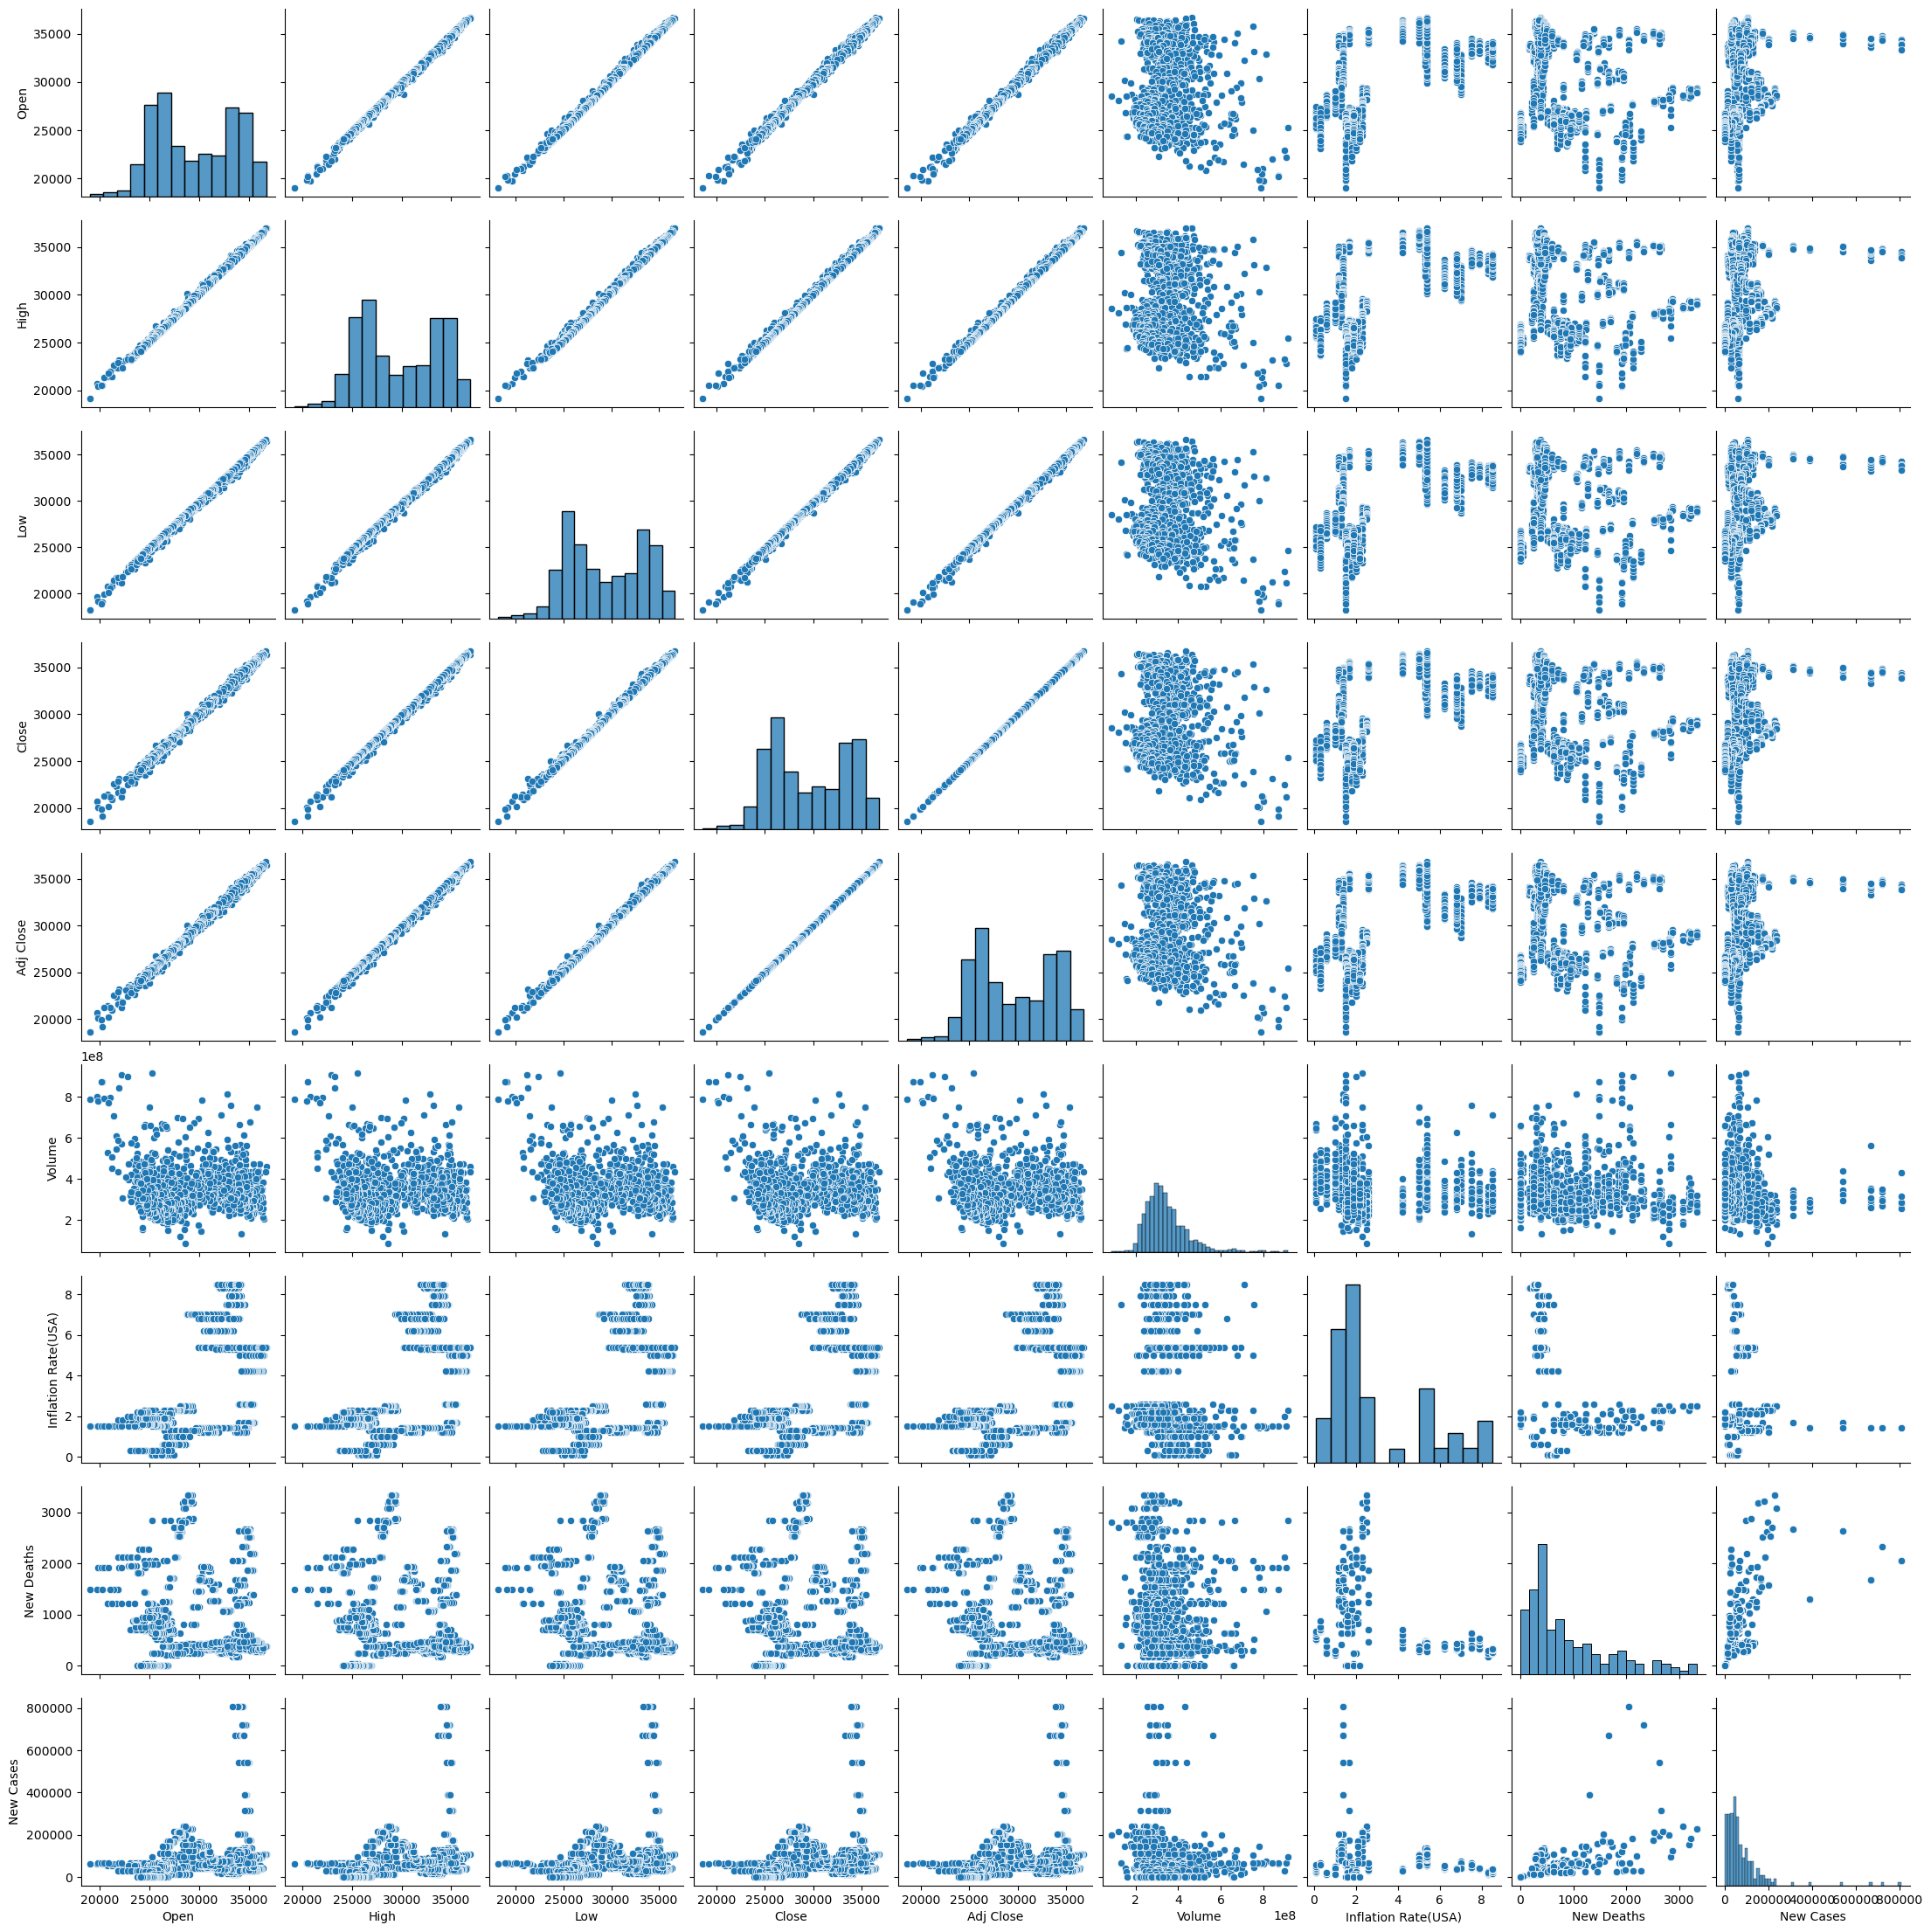

In [30]:
sns.pairplot(stock_pred)

In [31]:
stock_pred = stock_pred.sort_values(by='Date', ascending=True)

In [32]:
# Find the first and last date in the dataset
start_date = stock_pred['Date'].min()
end_date = stock_pred['Date'].max()

print("First date (start):", start_date)
print("Last date (end):", end_date)

First date (start): 2018-05-01 00:00:00
Last date (end): 2023-04-28 00:00:00


**EXPLORATORY DATA ANALYSIS (EDA)**

DATA MODELLING

In [33]:
cat_ft = [ft for ft in stock_pred.columns if stock_pred[ft].dtype=='O']
print("There are", len(cat_ft), "categorical features in the dataset.")
for ft in cat_ft:
    print(ft)

There are 0 categorical features in the dataset.


In [34]:
num_ft = [ft for ft in stock_pred.columns if stock_pred[ft].dtype!='O' and ft!='Date']
print("There are", len(num_ft), "numerical features in the dataset.")
for ft in num_ft:
    print(ft)

There are 9 numerical features in the dataset.
Open
High
Low
Close
Adj Close
Volume
Inflation Rate(USA)
New Deaths
New Cases


In [35]:
stock_pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,2.2,0.0,0.0
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,2.2,0.0,0.0
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2.2,0.0,0.0
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,2.2,0.0,0.0
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,2.2,0.0,0.0


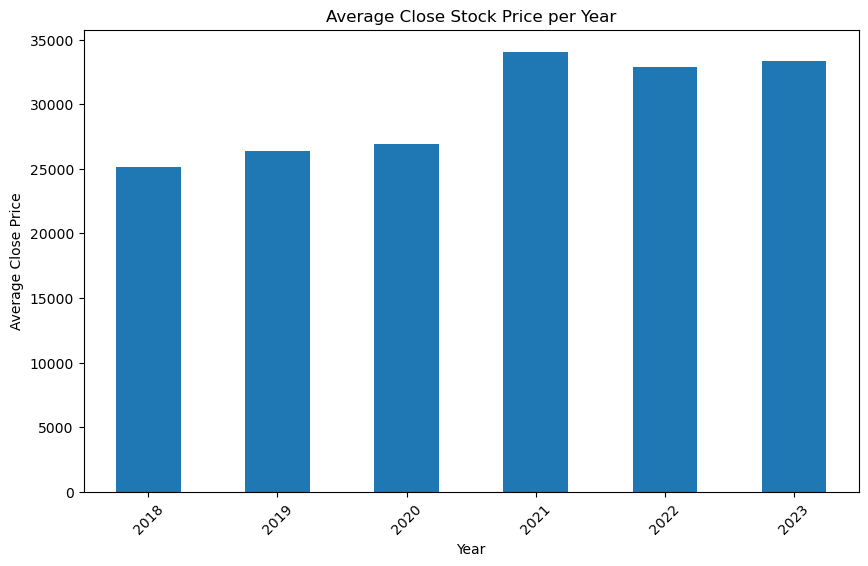

In [36]:
# Calculate average Close price per year
average_close_per_year = stock_pred.groupby(stock_pred['Date'].dt.year)['Close'].mean()

# Plot the bar graph
average_close_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Average Close Stock Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\mansi\AppData\Local\Temp\ipykernel_25500\3108414927.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_prices_per_month = stock_pred.groupby(stock_pred['Date'].dt.month_name())['High', 'Low'].mean()


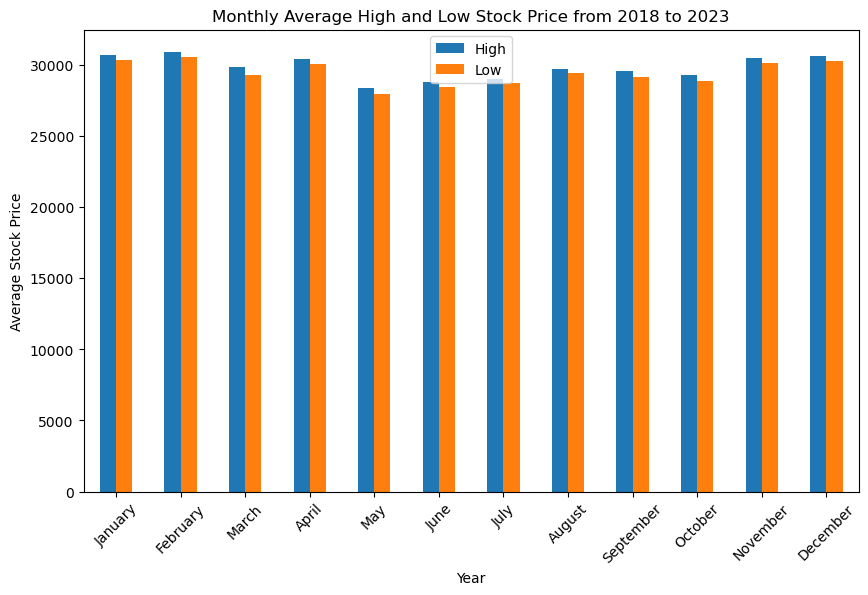

In [37]:
# Calculate average Close price per year
average_prices_per_month = stock_pred.groupby(stock_pred['Date'].dt.month_name())['High', 'Low'].mean()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_prices_per_month = average_prices_per_month.reindex(months_order)

# Plot the bar graph
average_prices_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average High and Low Stock Price from 2018 to 2023')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.xticks(rotation=45)  
plt.legend(['High', 'Low']) 
plt.show()

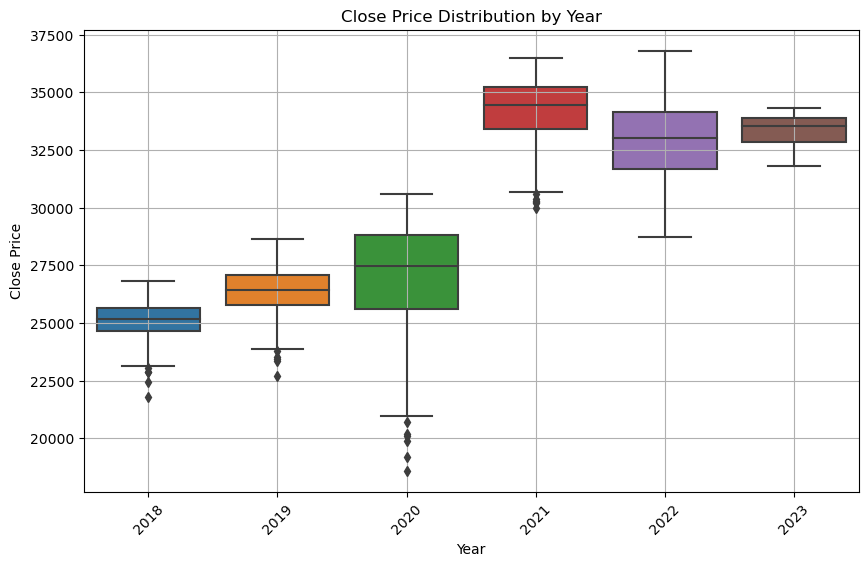

In [38]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_pred['Date'].dt.year, y='Close', data=stock_pred)
plt.title('Close Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [39]:
stock_pred.set_index('Date', inplace=True)

In [40]:
stock_pred.head()

,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
Date,,,,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,2.2,0.0,0.0
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,2.2,0.0,0.0
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2.2,0.0,0.0
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,2.2,0.0,0.0
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,2.2,0.0,0.0


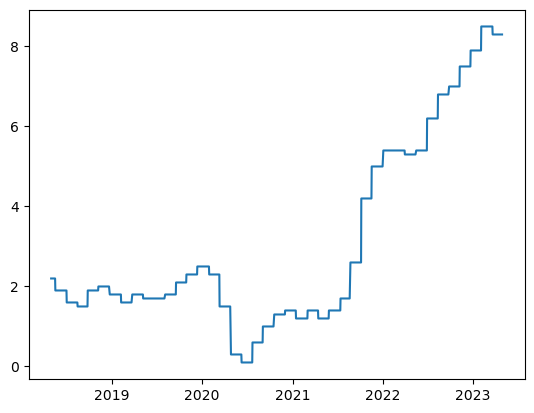

In [41]:
plt.plot(stock_pred['Inflation Rate(USA)'])

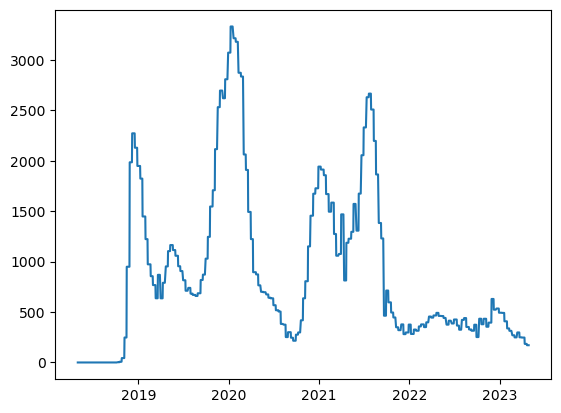

In [42]:
plt.plot(stock_pred['New Deaths'])

In [43]:
df = stock_pred[['Close']]

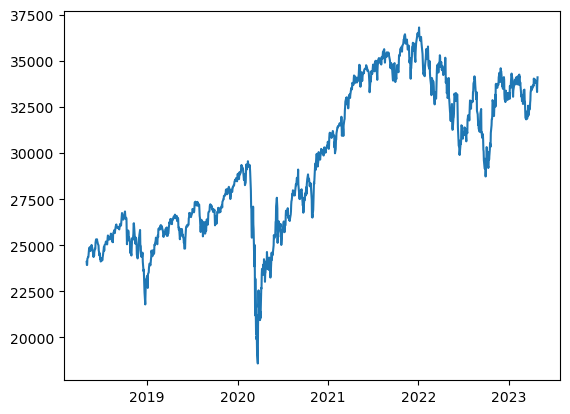

In [44]:
plt.plot(df)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
close_data = stock_pred['Close'].values.reshape(-1, 1)
scaler.fit(close_data)
df = scaler.transform(close_data)

In [46]:
df

array([[-1.37306099],
       [-1.41651466],
       [-1.41522406],
       ...,
       [ 0.9242694 ],
       [ 1.05514964],
       [ 1.1230499 ]])

In [47]:
min_close = stock_pred['Close'].min()
max_close = stock_pred['Close'].max()
df1 = (stock_pred['Close'] - min_close) / (max_close - min_close)

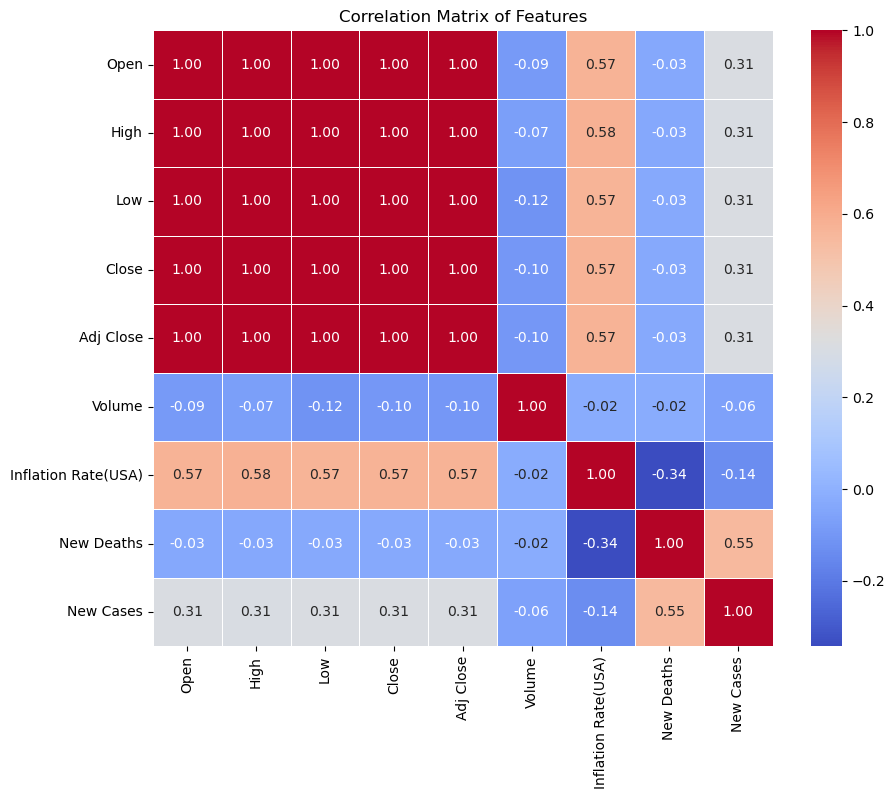

In [49]:
corr_matrix = stock_pred.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [50]:
X = df
#cannot split data via cross validation or random seend methods as future stock value is dependent on the previous data-> it's sequential
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train,test=df[0:training_size,:],df[training_size:len(df),:1]

In [51]:
len(train)

880

In [52]:
len(test)

378

In [53]:
# convert array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [55]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [56]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [57]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**LSTM MODEL**

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
# 3 LSTM layers added to the model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #return_sequence = True-> returning full sequence of outputs for each timestep; (100,1)=> 100 timesteps and 1 feature
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
#dense layer for output
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
13/13 [==============================] - 6s 191ms/step - loss: 0.4874 - val_loss: 0.0920
Epoch 2/50
13/13 [==============================] - 1s 93ms/step - loss: 0.1018 - val_loss: 0.1235
Epoch 3/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0733 - val_loss: 0.0634
Epoch 4/50
13/13 [==============================] - 1s 97ms/step - loss: 0.0599 - val_loss: 0.0709
Epoch 5/50
13/13 [==============================] - 1s 98ms/step - loss: 0.0525 - val_loss: 0.0650
Epoch 6/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0487 - val_loss: 0.0639
Epoch 7/50
13/13 [==============================] - 1s 102ms/step - loss: 0.0418 - val_loss: 0.0603
Epoch 8/50
13/13 [==============================] - 1s 101ms/step - loss: 0.0405 - val_loss: 0.0650
Epoch 9/50
13/13 [==============================] - 1s 102ms/step - loss: 0.0399 - val_loss: 0.0575
Epoch 10/50
13/13 [==============================] - 1s 105ms/step - loss: 0.0375 - val_loss: 0.0687
Epoc

In [60]:
import tensorflow as tf

'2.12.0'

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 25ms/step


In [62]:
#obtaining predictions in original state
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
org_stock= scaler.inverse_transform(df)
org_stock

array([[24099.05],
       [23924.98],
       [23930.15],
       ...,
       [33301.87],
       [33826.16],
       [34098.16]])

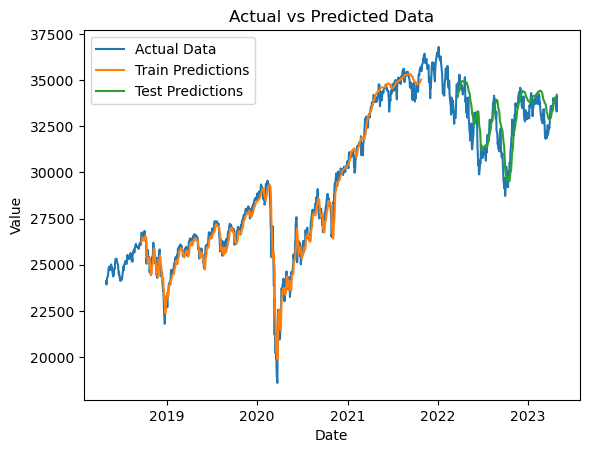

In [66]:
# Plotting
look_back=100 #window size-> considering past 100 days of data
plt.plot(stock_pred.index, scaler.inverse_transform(df), label='Actual Data')

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Plot train predictions
plt.plot(stock_pred.index, trainPredictPlot, label='Train Predictions')

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# Plot test predictions
plt.plot(stock_pred.index, testPredictPlot, label='Test Predictions')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()

In [67]:
test_predict

array([[34081.92 ],
       [34162.918],
       [34251.465],
       [34339.25 ],
       [34423.645],
       [34504.426],
       [34583.1  ],
       [34660.613],
       [34733.14 ],
       [34796.04 ],
       [34848.246],
       [34889.746],
       [34919.496],
       [34937.61 ],
       [34946.863],
       [34948.785],
       [34942.47 ],
       [34929.61 ],
       [34913.918],
       [34897.582],
       [34884.285],
       [34879.8  ],
       [34885.445],
       [34892.535],
       [34891.223],
       [34873.355],
       [34833.38 ],
       [34776.363],
       [34706.773],
       [34624.09 ],
       [34531.36 ],
       [34443.16 ],
       [34365.3  ],
       [34291.13 ],
       [34208.64 ],
       [34108.043],
       [33983.668],
       [33834.38 ],
       [33673.64 ],
       [33519.26 ],
       [33390.02 ],
       [33274.785],
       [33151.67 ],
       [33012.09 ],
       [32873.953],
       [32756.174],
       [32670.555],
       [32630.209],
       [32646.58 ],
       [32709.523],


In [68]:
len(test)

378

In [69]:
x_input=test[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [70]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[1.0853402941508004,
 0.997778915494299,
 0.9981733361188783,
 1.043996025895899,
 0.9678528746876475,
 1.099804047940736,
 1.1256660585143856,
 1.090145735304688,
 0.8993934366594841,
 0.8290567561649698,
 0.7883864978381453,
 0.8114026887154663,
 0.9428945366842361,
 0.8557750089805849,
 0.8998203096139331,
 0.9092140109448827,
 0.8178856656903478,
 0.9040316234978862,
 0.8856710937904342,
 0.8829550834135882,
 0.9162561665267616,
 0.8314582285753808,
 1.0063338489147535,
 0.9781352705904343,
 1.0246794006238027,
 1.0918082931272806,
 1.1459687353479282,
 1.1740874310141052,
 1.0762910867830897,
 0.9230436961358118,
 0.8600362495258764,
 0.9426473997106063,
 1.0060717339427225,
 1.0321334511617293,
 1.0345998282318798,
 1.085916947089268,
 1.0930739339922266,
 1.0279221372777763,
 1.1200243457830685,
 1.1217518082654008,
 1.1120111166381446,
 1.080075527712594,
 1.0713408583113182,
 1.1376609389011034,
 1.0858170937665896,
 1.0236259480695475,
 1.065911333890692,
 1.1599382151906061,

In [71]:
x_input.shape

(1, 100)

In [72]:
 # prediction for next 30 days
stock_op=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        stock_op.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        stock_op.extend(yhat.tolist())
        i=i+1


print(stock_op)

[1.1513238]
101
1 day input [0.99777892 0.99817334 1.04399603 0.96785287 1.09980405 1.12566606
 1.09014574 0.89939344 0.82905676 0.7883865  0.81140269 0.94289454
 0.85577501 0.89982031 0.90921401 0.81788567 0.90403162 0.88567109
 0.88295508 0.91625617 0.83145823 1.00633385 0.97813527 1.0246794
 1.09180829 1.14596874 1.17408743 1.07629109 0.9230437  0.86003625
 0.9426474  1.00607173 1.03213345 1.03459983 1.08591695 1.09307393
 1.02792214 1.12002435 1.12175181 1.11201112 1.08007553 1.07134086
 1.13766094 1.08581709 1.02362595 1.06591133 1.15993822 1.12083066
 1.13051144 1.02286956 1.05528195 0.88126257 0.86016856 0.88733365
 0.80320972 0.82122576 0.76321348 0.76449659 0.84980378 0.94651172
 0.95661438 0.81308022 0.79858651 0.66290083 0.57672242 0.5541306
 0.6380723  0.56796778 0.66082637 0.56482489 0.6603346  0.73922371
 0.60679574 0.62555319 0.65857468 0.70714084 0.69769721 0.77841614
 0.81372178 0.91734956 0.99897965 0.94936004 0.96941558 0.97005714
 0.99532752 1.01985898 1.01030052 1.

11 day output [[1.2441217]]
12 day input [0.94289454 0.85577501 0.89982031 0.90921401 0.81788567 0.90403162
 0.88567109 0.88295508 0.91625617 0.83145823 1.00633385 0.97813527
 1.0246794  1.09180829 1.14596874 1.17408743 1.07629109 0.9230437
 0.86003625 0.9426474  1.00607173 1.03213345 1.03459983 1.08591695
 1.09307393 1.02792214 1.12002435 1.12175181 1.11201112 1.08007553
 1.07134086 1.13766094 1.08581709 1.02362595 1.06591133 1.15993822
 1.12083066 1.13051144 1.02286956 1.05528195 0.88126257 0.86016856
 0.88733365 0.80320972 0.82122576 0.76321348 0.76449659 0.84980378
 0.94651172 0.95661438 0.81308022 0.79858651 0.66290083 0.57672242
 0.5541306  0.6380723  0.56796778 0.66082637 0.56482489 0.6603346
 0.73922371 0.60679574 0.62555319 0.65857468 0.70714084 0.69769721
 0.77841614 0.81372178 0.91734956 0.99897965 0.94936004 0.96941558
 0.97005714 0.99532752 1.01985898 1.01030052 1.10595751 1.07020503
 1.0953456  1.09271197 1.07283616 1.04527914 1.05085595 1.06744159
 0.98142544 0.9242694  

23 day output [[1.327851]]
24 day input [1.0246794  1.09180829 1.14596874 1.17408743 1.07629109 0.9230437
 0.86003625 0.9426474  1.00607173 1.03213345 1.03459983 1.08591695
 1.09307393 1.02792214 1.12002435 1.12175181 1.11201112 1.08007553
 1.07134086 1.13766094 1.08581709 1.02362595 1.06591133 1.15993822
 1.12083066 1.13051144 1.02286956 1.05528195 0.88126257 0.86016856
 0.88733365 0.80320972 0.82122576 0.76321348 0.76449659 0.84980378
 0.94651172 0.95661438 0.81308022 0.79858651 0.66290083 0.57672242
 0.5541306  0.6380723  0.56796778 0.66082637 0.56482489 0.6603346
 0.73922371 0.60679574 0.62555319 0.65857468 0.70714084 0.69769721
 0.77841614 0.81372178 0.91734956 0.99897965 0.94936004 0.96941558
 0.97005714 0.99532752 1.01985898 1.01030052 1.10595751 1.07020503
 1.0953456  1.09271197 1.07283616 1.04527914 1.05085595 1.06744159
 0.98142544 0.9242694  1.05514964 1.1230499  1.1513238  1.15392923
 1.15897191 1.1662271  1.17508721 1.18491304 1.19518006 1.20551407
 1.2156769  1.22553432 1

In [73]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131) #predicting Close price of the stock for 30 days
import matplotlib.pyplot as plt
len(df)

1258

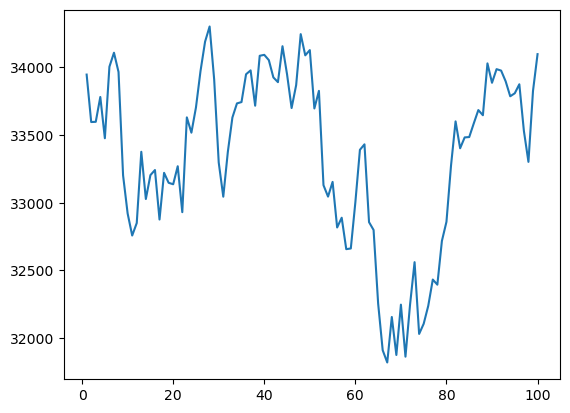

In [74]:
plt.plot(day_new,scaler.inverse_transform(df[1158:]))

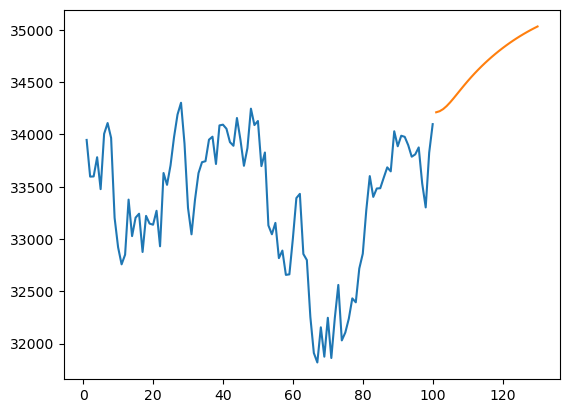

In [75]:
plt.plot(day_new,scaler.inverse_transform(df[1158:]))
plt.plot(day_pred,scaler.inverse_transform(stock_op))

In [76]:
stock_pred.head()

,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
Date,,,,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,2.2,0.0,0.0
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,2.2,0.0,0.0
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2.2,0.0,0.0
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,2.2,0.0,0.0
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,2.2,0.0,0.0


In [77]:
last_date = stock_pred.index[-1]  # Get the last date in the dataset
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
predicted_dates

DatetimeIndex(['2023-04-29', '2023-04-30', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06',
               '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10',
               '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-14',
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-27', '2023-05-28'],
              dtype='datetime64[ns]', freq='D')

In [78]:
past_year_data = stock_pred[len(train_predict)+(look_back*2)+1:len(df)-1:]
past_year_data.head()

,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
Date,,,,,,,,,
2022-03-22,34583.24,34882.03,34583.24,34807.46,34807.46,368550000,5.4,455.286,129813.57
2022-03-23,34748.84,34748.84,34352.96,34358.50,34358.50,347880000,5.4,455.286,129813.57
2022-03-24,34406.81,34713.56,34355.42,34707.94,34707.94,324870000,5.4,455.286,129813.57
2022-03-25,34702.39,34942.70,34631.52,34861.24,34861.24,285440000,5.4,455.286,129813.57
2022-03-28,34833.03,34957.93,34552.23,34955.89,34955.89,299790000,5.4,455.286,129813.57


In [79]:
org_stock

array([[24099.05],
       [23924.98],
       [23930.15],
       ...,
       [33301.87],
       [33826.16],
       [34098.16]])

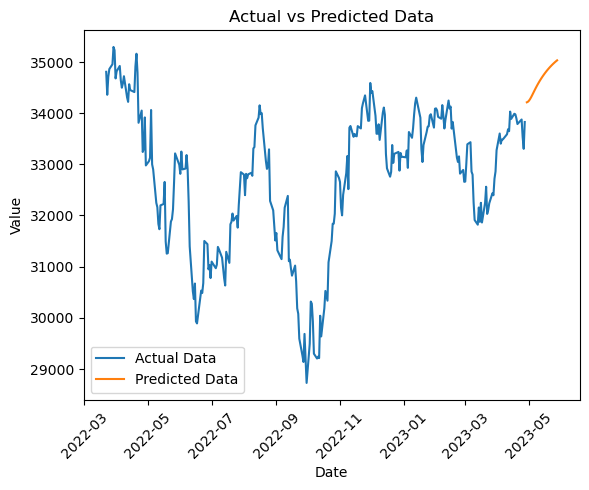

In [80]:
import matplotlib.pyplot as plt

past_year_data = stock_pred[len(train_predict)+(look_back*2)+1:len(df)-1:]

# Plot the data with 'Date' as the x-axis
plt.plot(past_year_data.index, org_stock[len(train_predict)+(look_back*2)+1:len(df)-1:], label='Actual Data')
plt.plot(predicted_dates, scaler.inverse_transform(stock_op), label='Predicted Data')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Data')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()


**Model Performance**

In [63]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28529.179547865424

In [64]:
math.sqrt(mean_squared_error(ytest,test_predict))

33166.48847891485

In [81]:
#absolute error
error_train = np.abs(org_stock[look_back:len(train_predict)+look_back, :] - train_predict)
error_test = np.abs(org_stock[len(train_predict)+(look_back*2)+1:len(df)-1, :] - test_predict)
percentage_error = (error_test / org_stock[len(train_predict)+(look_back*2)+1:len(df)-1]) * 100

mpe_lstm1 = np.mean(percentage_error)

print("Mean Percentage Error:", mean_percentage_error)


Mean Percentage Error: 2.4365121906814635


Long Short term memory=> forget gate nullifies a few features based on the context

**ARIMA**

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [83]:
stock_arima = stock_pred.copy()
stock_arima.head()

,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
Date,,,,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,2.2,0.0,0.0
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,2.2,0.0,0.0
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2.2,0.0,0.0
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,2.2,0.0,0.0
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,2.2,0.0,0.0


In [84]:
stock_arima.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Inflation Rate(USA)', 'New Deaths', 'New Cases'],
      dtype='object')

In [85]:
stock_arima = stock_arima.loc[:, ["Close"]]
print(stock_arima)

               Close
Date                
2018-05-01  24099.05
2018-05-02  23924.98
2018-05-03  23930.15
2018-05-04  24262.51
2018-05-07  24357.32
...              ...
2023-04-24  33875.40
2023-04-25  33530.83
2023-04-26  33301.87
2023-04-27  33826.16
2023-04-28  34098.16

[1258 rows x 1 columns]


In [86]:
stock_arima = stock_arima.sort_values(by='Date', ascending=True)
stock_arima.head()

,Close
Date,
2018-05-01,24099.05
2018-05-02,23924.98
2018-05-03,23930.15
2018-05-04,24262.51
2018-05-07,24357.32


<Axes: xlabel='Date'>

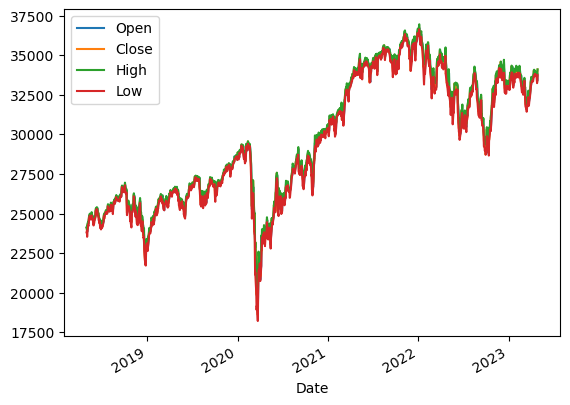

In [87]:
stock_pred[['Open', 'Close', 'High', 'Low']].plot() #highly correlated => so consider only one of the features

<Axes: xlabel='Date'>

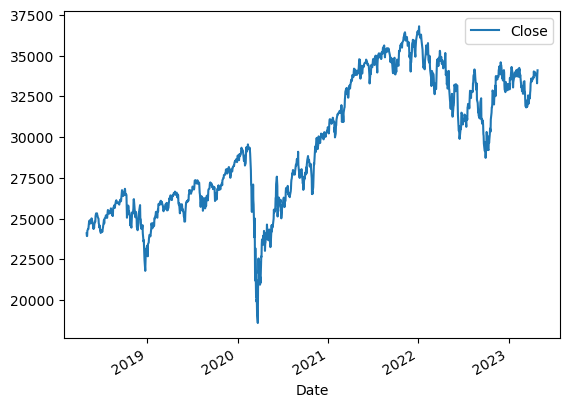

In [88]:
stock_arima.plot()

In [89]:
#test if data is stationary or not
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(stock_arima['Close'])

In [90]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [91]:
adfuller_test(stock_arima['Close'])

ADF Test Statistic : -1.6159587831588471
p-value : 0.47484857865511687
#Lags Used : 9
Number of Observations Used : 1248
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


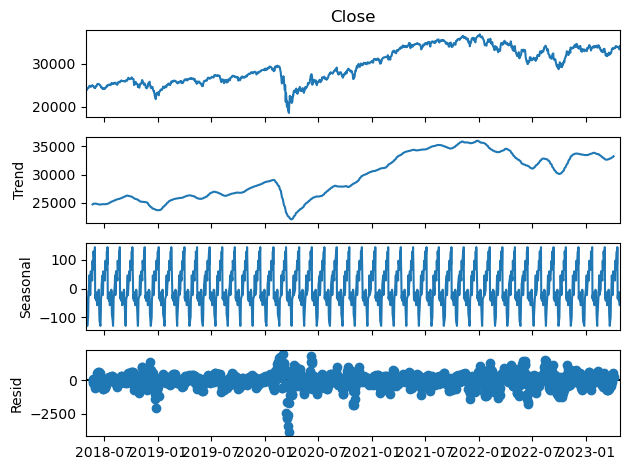

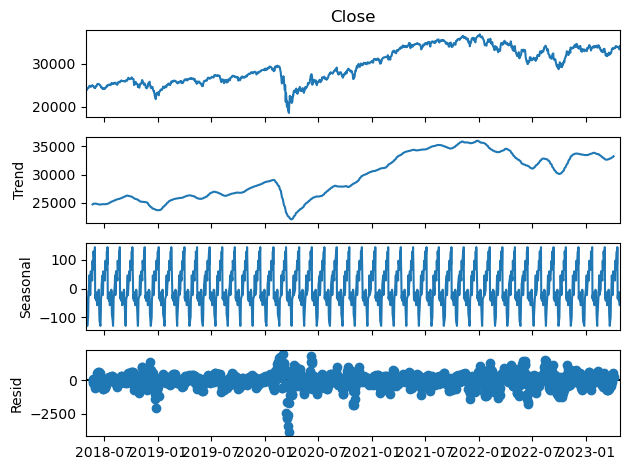

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(stock_arima['Close'], model = 'additive', period =30)
decompose.plot()

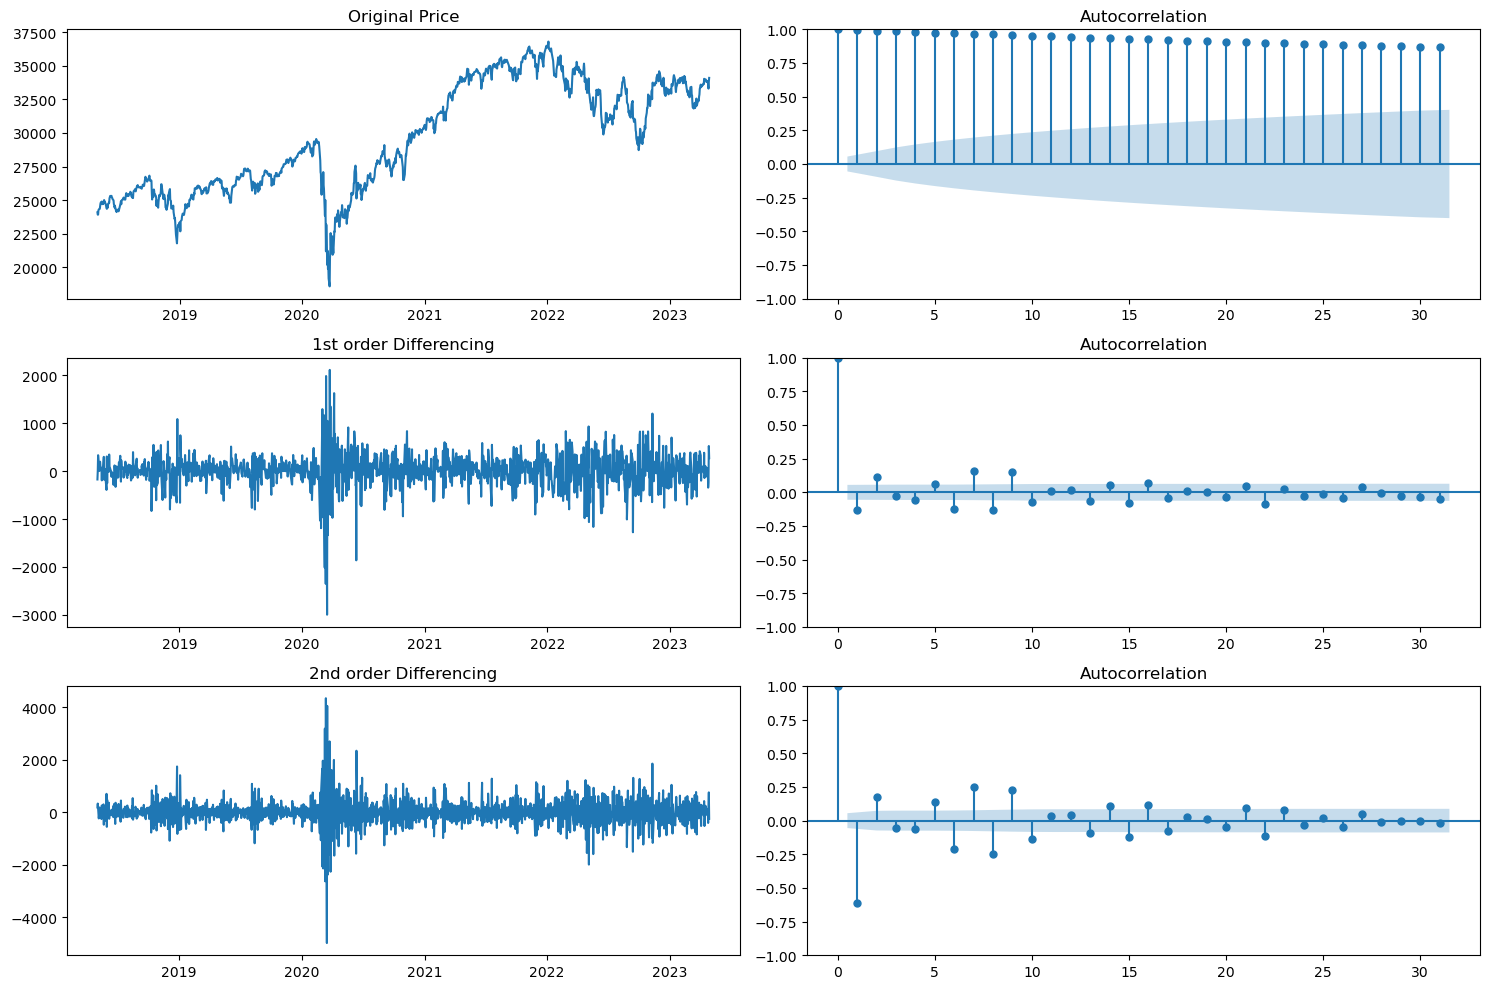

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

stock_arima.index = pd.to_datetime(stock_arima.index)
# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

axes[0, 0].plot(stock_arima.index, stock_arima['Close'])
axes[0, 0].set_title('Original Price')
axes[0, 0].tick_params(axis='x')

plot_acf(stock_arima['Close'], ax=axes[0, 1])

# 1st differencing
axes[1, 0].plot(stock_arima.index, stock_arima['Close'].diff())
axes[1, 0].set_title('1st order Differencing')
axes[1, 0].tick_params(axis='x')

plot_acf(stock_arima['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd differencing
axes[2, 0].plot(stock_arima.index, stock_arima['Close'].diff().diff())
axes[2, 0].set_title('2nd order Differencing')
axes[2, 0].tick_params(axis='x')

plot_acf(stock_arima['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()


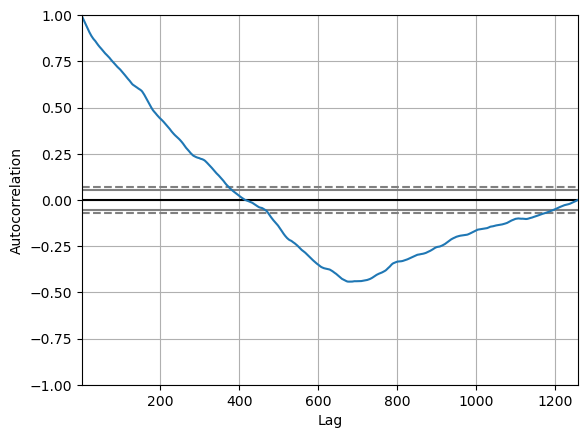

In [94]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(stock_arima['Close'])
plt.show()

In [95]:
stock_arima['Close First Difference'] = stock_arima['Close'] - stock_arima['Close'].shift(1)
stock_arima.head()

,Close,Close First Difference
Date,,
2018-05-01,24099.05,NaN
2018-05-02,23924.98,-174.07
2018-05-03,23930.15,5.17
2018-05-04,24262.51,332.36
2018-05-07,24357.32,94.81


In [96]:
stock_arima = stock_arima.dropna()
adfuller_test(stock_arima['Close First Difference'].dropna())

ADF Test Statistic : -10.83441643567
p-value : 1.6761855343894859e-19
#Lags Used : 9
Number of Observations Used : 1247
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [97]:
stock_arima['Close Monthly Difference'] = stock_arima['Close'] - stock_arima['Close'].shift(30)
stock_arima.head()

C:\Users\mansi\AppData\Local\Temp\ipykernel_25500\1560954790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_arima['Close Monthly Difference'] = stock_arima['Close'] - stock_arima['Close'].shift(30)


,Close,Close First Difference,Close Monthly Difference
Date,,,
2018-05-02,23924.98,-174.07,NaN
2018-05-03,23930.15,5.17,NaN
2018-05-04,24262.51,332.36,NaN
2018-05-07,24357.32,94.81,NaN
2018-05-08,24360.21,2.89,NaN


In [98]:
stock_arima = stock_arima.dropna()
adfuller_test(stock_arima['Close Monthly Difference'].dropna())

ADF Test Statistic : -5.972801719319058
p-value : 1.9184177232407557e-07
#Lags Used : 9
Number of Observations Used : 1217
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


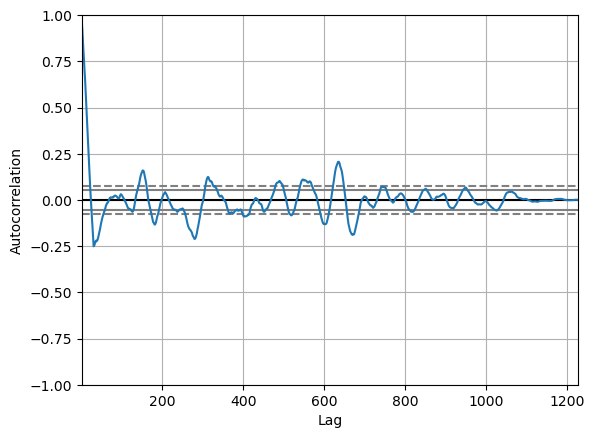

In [99]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(stock_arima['Close Monthly Difference'])
plt.show()

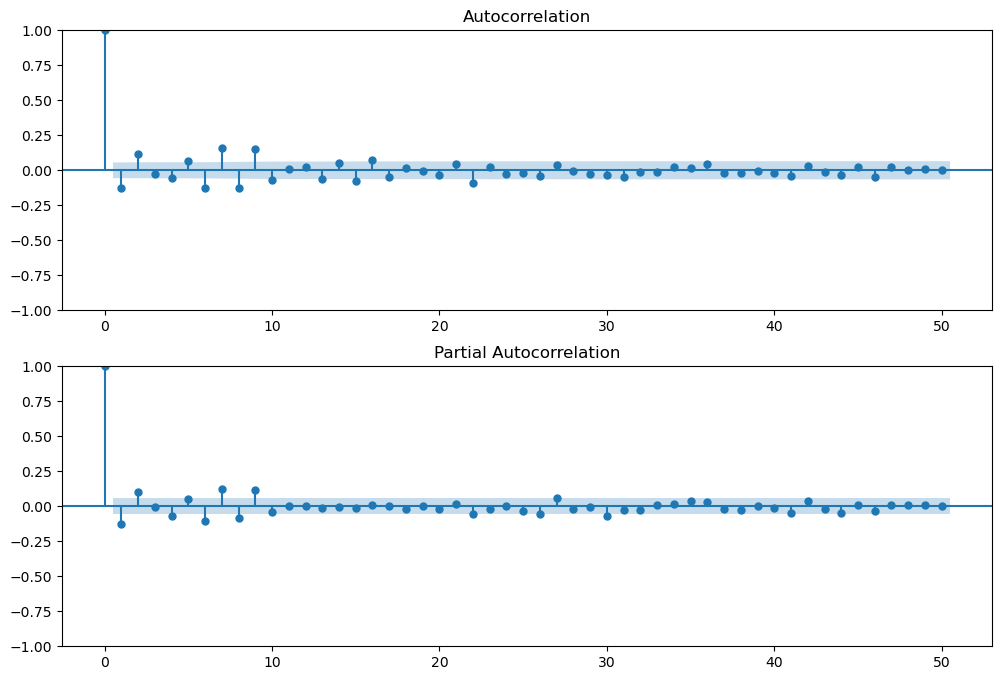

In [100]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_arima['Close First Difference'].iloc[1:],lags=50,ax=ax1) #moving average
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_arima['Close First Difference'].iloc[1:],lags=50,ax=ax2) #auto regression
#p= 8

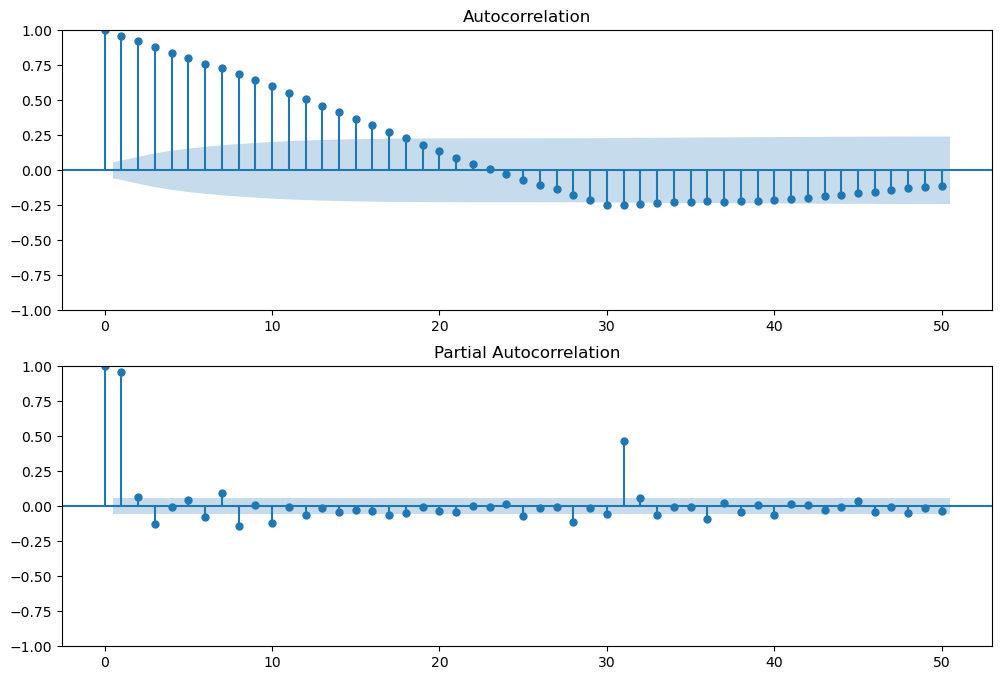

In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_arima['Close Monthly Difference'].iloc[31:],lags=50,ax=ax1) #moving average
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_arima['Close Monthly Difference'].iloc[31:],lags=50,ax=ax2) #auto regression
#q=18? p=10

In [102]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(stock_arima['Close'],order=(0, 0, 0),seasonal_order=(1,0,0,30), freg ='D' )
res=model.fit()

C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freg']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seas

In [103]:
model_ARIMA=ARIMA(stock_arima['Close'],order=(8,1,10))
arima_res = model_ARIMA.fit()
arima_res.summary()

C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mansi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1227
Model:                ARIMA(8, 1, 10)   Log Likelihood               -8916.673
Date:                Tue, 23 Apr 2024   AIC                          17871.346
Time:                        17:45:44   BIC                          17968.464
Sample:                             0   HQIC                         17907.891
                               - 1227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1631      0.162     -1.006      0.315      -0.481       0.155
ar.L2          0.5050      0.144      3.505      0.000       0.223       0.787
ar.L3         -0.1016      0.070     -1.447      0.148      -0.239       0.036
ar.L4          0.0617      0.079      0.778      0.437      -0.094       0.217
ar.L5         -0.0867      0.081     -1.066      0.287      -0.246       0.073
ar.L6         -0.5896      0.083     -7.146      0.000      -0.751      -0.428
ar.L7          0.4631      0.088      5.257      0.000       0.290       0.636
ar.L8          0.6416      0.138      4.641      0.000       0.371       0.913
ma.L1          0.0967      0.160      0.604      0.546      -0.217       0.411
ma.L2         -0.4393      0.153     -2.862      0.004      -0.740      -0.138
ma.L3          0.1313      0.067      1.968      0.049       0.001       0.262
ma.L4         -0.1658      0.077     -2.158      0.031      -0.316      -0.015
ma.L5          0.1558      0.081      1.931      0.053      -0.002       0.314
ma.L6          0.5184      0.096      5.382      0.000       0.330       0.707
ma.L7         -0.4563      0.086     -5.319      0.000      -0.624      -0.288
ma.L8         -0.5858      0.116     -5.070      0.000      -0.812      -0.359
ma.L9          0.0200      0.029      0.683      0.495      -0.037       0.077
ma.L10        -0.0622      0.029     -2.112      0.035      -0.120      -0.004
sigma2      1.244e+05   3085.438     40.330      0.000    1.18e+05     1.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              1865.13
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

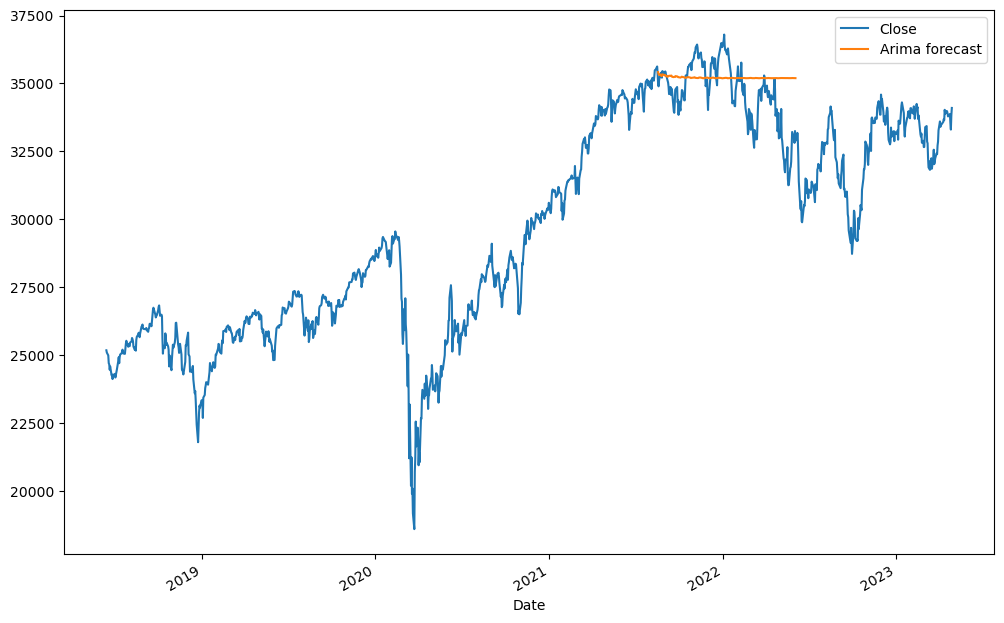

In [104]:
stock_arima['Arima forecast']=arima_res.predict(start=800,end=1000,dynamic=True)
stock_arima[['Close','Arima forecast']].plot(figsize=(12,8))

In [105]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                    Close   No. Observations:                 1227
Model:             SARIMAX(1, 0, 0, 30)   Log Likelihood              -11043.397
Date:                  Tue, 23 Apr 2024   AIC                          22090.793
Time:                          17:45:44   BIC                          22101.018
Sample:                               0   HQIC                         22094.641
                                 - 1227                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L30       0.9980      0.001    685.693      0.000       0.995       1.001
sigma2       3.34e+06   1.06e-11   3.16e+17      0.000    3.34e+06    3.34e+06
===================================================================================
Ljung-Box (L1) (Q):                1128.71   Jarque-Bera (JB):              2260.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.01e+31. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

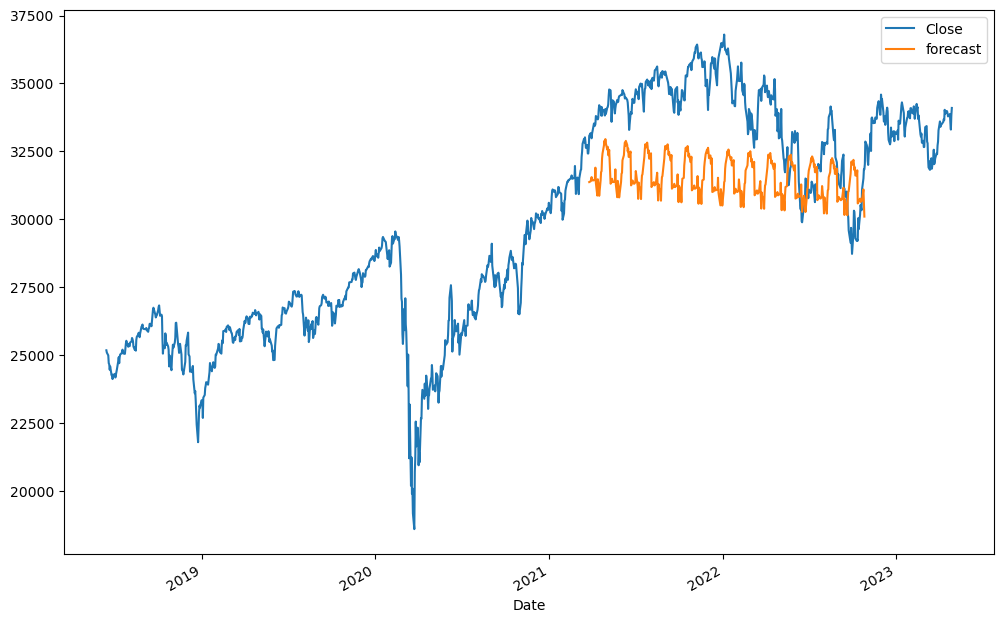

In [108]:
stock_arima['forecast']=res.predict(start=700,end=1100,dynamic=True)
stock_arima[['Close','forecast']].plot(figsize=(12,8))

In [109]:
stock_arima =stock_arima.dropna()
stock_arima.head()

,Close,Close First Difference,Close Monthly Difference,Arima forecast,forecast
Date,,,,,
2021-08-18,34960.69,-382.59,278.90,35416.767250,30691.775099
2021-08-19,34894.12,-66.57,472.19,35346.874238,31290.223819
2021-08-20,35120.08,225.96,249.92,35319.187039,31147.353786
2021-08-23,35335.71,215.63,339.53,35328.563578,31026.868281
2021-08-24,35366.26,30.55,477.47,35286.778203,30683.609112


**Model Performance**

In [110]:
from sklearn.metrics import mean_squared_error

mse_arima = mean_squared_error(stock_arima['Close'], stock_arima['forecast'])
print("Mean Squared Error (MSE) for ARIMA model:", mse_arima)

y_true_arima = np.array(stock_arima['Close'])  # Actual values
y_pred_arima = np.array(stock_arima['forecast'])  # Predicted values

absolute_error_arima = np.abs(y_true_arima - y_pred_arima)

mae_arima = np.mean(absolute_error_arima)

percentage_error_arima = (mae_arima / np.mean(y_true_arima)) * 100

print("Percentage Error for ARIMA:", percentage_error_arima)


Mean Squared Error (MSE) for ARIMA model: 11748148.409241678
Percentage Error for ARIMA: 9.160037477079813


In [111]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


**Multivariate Time Series Forecasting**

In [112]:
multistock = stock_pred.copy()

In [113]:
multistock.head()

,Open,High,Low,Close,Adj Close,Volume,Inflation Rate(USA),New Deaths,New Cases
Date,,,,,,,,,
2018-05-01,24117.29,24117.29,23808.19,24099.05,24099.05,380070000,2.2,0.0,0.0
2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,2.2,0.0,0.0
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,2.2,0.0,0.0
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,2.2,0.0,0.0
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,2.2,0.0,0.0


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

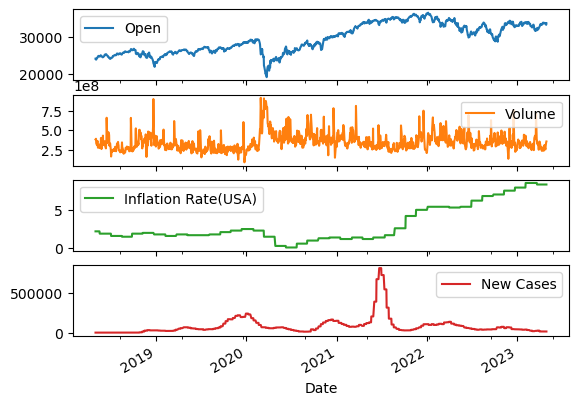

In [114]:
multistock[['Open', 'Volume', 'Inflation Rate(USA)', 'New Cases']].plot(subplots=True)

In [115]:
df_input = stock_pred[['Close', 'Inflation Rate(USA)', 'New Cases']]

In [116]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


In [117]:
df_input.shape

(1258, 3)

In [118]:
df_input.head()

,Close,Inflation Rate(USA),New Cases
Date,,,
2018-05-01,24099.05,2.2,0.0
2018-05-02,23924.98,2.2,0.0
2018-05-03,23930.15,2.2,0.0
2018-05-04,24262.51,2.2,0.0
2018-05-07,24357.32,2.2,0.0


In [119]:
test_split=round(len(df)*0.30)
train_df=df_input[:-test_split]
test_df=df_input[-test_split:]
print(train_df.shape)
print(test_df.shape)

(881, 3)
(377, 3)


In [120]:
test_df.tail()

,Close,Inflation Rate(USA),New Cases
Date,,,
2023-04-24,33875.40,8.3,14066.714
2023-04-25,33530.83,8.3,14066.714
2023-04-26,33301.87,8.3,14066.714
2023-04-27,33826.16,8.3,14066.714
2023-04-28,34098.16,8.3,14066.714


In [121]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_df)
test_scaled=scaler.transform(test_df)
train_scaled

array([[0.32083519, 0.51219512, 0.        ],
       [0.31069418, 0.51219512, 0.        ],
       [0.31099537, 0.51219512, 0.        ],
       ...,
       [0.9990836 , 1.        , 0.03560333],
       [1.        , 1.        , 0.03560333],
       [0.98449224, 1.        , 0.03560333]])

In [122]:
def createXY(df_input,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(df_input)):
            dataX.append(df_input[i - n_past:i, 0:df_input.shape[1]])
            dataY.append(df_input[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(train_scaled,100)
testX,testY=createXY(test_scaled,100)

In [123]:
print("trainX Shape: ",trainX.shape)
print("trainY Shape: ",trainY.shape)

trainX Shape:  (781, 100, 3)
trainY Shape:  (781,)


In [124]:
print("testX Shape-- ",testX.shape)
print("testX Shape-- ",testY.shape)

testX Shape--  (277, 100, 3)
testX Shape--  (277,)


In [125]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[3.20835190e-01 5.12195122e-01 0.00000000e+00]
 [3.10694176e-01 5.12195122e-01 0.00000000e+00]
 [3.10995371e-01 5.12195122e-01 0.00000000e+00]
 [3.30358084e-01 5.12195122e-01 0.00000000e+00]
 [3.35881549e-01 5.12195122e-01 0.00000000e+00]
 [3.36049916e-01 5.12195122e-01 0.00000000e+00]
 [3.46672143e-01 5.12195122e-01 0.00000000e+00]
 [3.58148436e-01 5.12195122e-01 0.00000000e+00]
 [3.63487223e-01 5.12195122e-01 0.00000000e+00]
 [3.67462766e-01 5.12195122e-01 0.00000000e+00]
 [3.56218923e-01 5.12195122e-01 0.00000000e+00]
 [3.59861229e-01 5.12195122e-01 0.00000000e+00]
 [3.56659938e-01 5.12195122e-01 0.00000000e+00]
 [3.56724604e-01 4.39024390e-01 0.00000000e+00]
 [3.74097216e-01 4.39024390e-01 0.00000000e+00]
 [3.63675979e-01 4.39024390e-01 0.00000000e+00]
 [3.66728712e-01 4.39024390e-01 0.00000000e+00]
 [3.62356430e-01 4.39024390e-01 0.00000000e+00]
 [3.58938418e-01 4.39024390e-01 0.00000000e+00]
 [3.36122156e-01 4.39024390e-01 0.00000000e+00]
 [3.53968407e-01 4.3902439

In [126]:
def build_model(optimizer):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(100, 3)))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# KerasRegressor wrapper for the model
grid_model = KerasRegressor(build_fn=build_model, verbose=1)

# Defining the grid search parameters
parameters = {
    'batch_size': [16, 20],
    'epochs': [10, 50],
    'optimizer': ['adam', 'AdaDelta']
}

grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)

C:\Users\mansi\AppData\Local\Temp\ipykernel_25500\3120857682.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model, verbose=1)


In [127]:
trainY.shape

(781,)

In [128]:
grid_search = grid_search.fit(trainX, trainY)

Epoch 1/50
20/20 [==============================] - 4s 31ms/step - loss: 0.1057
Epoch 2/50
20/20 [==============================] - 1s 32ms/step - loss: 0.0182
Epoch 3/50
20/20 [==============================] - 1s 34ms/step - loss: 0.0092
Epoch 4/50
20/20 [==============================] - 1s 33ms/step - loss: 0.0075
Epoch 5/50
20/20 [==============================] - 1s 34ms/step - loss: 0.0062
Epoch 6/50
20/20 [==============================] - 1s 32ms/step - loss: 0.0066
Epoch 7/50
20/20 [==============================] - 1s 32ms/step - loss: 0.0058
Epoch 8/50
20/20 [==============================] - 1s 32ms/step - loss: 0.0055
Epoch 9/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0048
Epoch 10/50
20/20 [==============================] - 1s 41ms/step - loss: 0.0046
Epoch 11/50
20/20 [==============================] - 1s 41ms/step - loss: 0.0045
Epoch 12/50
20/20 [==============================] - 1s 33ms/step - loss: 0.0046
Epoch 13/50
20/20 [==================

20/20 [==============================] - 1s 12ms/step - loss: 0.0107
Epoch 1/50
40/40 [==============================] - 5s 41ms/step - loss: 0.0354
Epoch 2/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0065
Epoch 3/50
40/40 [==============================] - 1s 37ms/step - loss: 0.0055
Epoch 4/50
40/40 [==============================] - 1s 35ms/step - loss: 0.0047
Epoch 5/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0043
Epoch 6/50
40/40 [==============================] - 1s 34ms/step - loss: 0.0041
Epoch 7/50
40/40 [==============================] - 1s 33ms/step - loss: 0.0043
Epoch 8/50
40/40 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 9/50
40/40 [==============================] - 1s 35ms/step - loss: 0.0041
Epoch 10/50
40/40 [==============================] - 2s 48ms/step - loss: 0.0039
Epoch 11/50
40/40 [==============================] - 2s 42ms/step - loss: 0.0041
Epoch 12/50
40/40 [==============================

In [129]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 50, 'optimizer': 'adam'}

In [130]:
my_model=grid_search.best_estimator_.model

In [131]:
prediction=my_model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

9/9 [==============================] - 1s 12ms/step
prediction
 [[0.90766114]
 [0.9141581 ]
 [0.91907877]
 [0.9237682 ]
 [0.9284001 ]
 [0.936129  ]
 [0.94284856]
 [0.941121  ]
 [0.9377182 ]
 [0.93518335]
 [0.93003064]
 [0.92299885]
 [0.91747504]
 [0.9155288 ]
 [0.9103331 ]
 [0.9036534 ]
 [0.9015808 ]
 [0.9005044 ]
 [0.89976156]
 [0.9054498 ]
 [0.9161951 ]
 [0.9228665 ]
 [0.9147306 ]
 [0.904261  ]
 [0.8843037 ]
 [0.86430216]
 [0.8548979 ]
 [0.840697  ]
 [0.8281699 ]
 [0.81936014]
 [0.825078  ]
 [0.8238693 ]
 [0.81909084]
 [0.8056495 ]
 [0.7896111 ]
 [0.7710326 ]
 [0.7532133 ]
 [0.74428856]
 [0.7415062 ]
 [0.74743116]
 [0.7428368 ]
 [0.7316609 ]
 [0.7191479 ]
 [0.7151808 ]
 [0.7163583 ]
 [0.72218007]
 [0.73542273]
 [0.756817  ]
 [0.7759343 ]
 [0.7884297 ]
 [0.8006001 ]
 [0.80587107]
 [0.8069767 ]
 [0.8087542 ]
 [0.80699056]
 [0.7961917 ]
 [0.77239937]
 [0.7361265 ]
 [0.6982433 ]
 [0.6693212 ]
 [0.6409472 ]
 [0.6176191 ]
 [0.60833657]
 [0.60718465]
 [0.61298704]
 [0.63120043]
 [0.65201586

In [132]:
pred_copy = np.repeat(prediction, 3, axis=-1)

In [133]:
pred_copy.shape

(277, 3)

In [134]:
pred=scaler.inverse_transform(np.reshape(pred_copy,(len(prediction),3)))[:,0]

In [136]:
orig_copy = np.repeat(testY,3, axis=-1)
original=scaler.inverse_transform(np.reshape(orig_copy,(len(testY),3)))[:,0]

In [137]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [34171.89  34283.406 34367.87  34448.363 34527.87  34660.535 34775.88
 34746.223 34687.816 34644.305 34555.86  34435.156 34340.344 34306.934
 34217.754 34103.094 34067.52  34049.043 34036.293 34133.93  34318.375
 34432.887 34293.234 34113.523 33770.957 33427.633 33266.21  33022.453
 32807.426 32656.205 32754.352 32733.605 32651.582 32420.863 32145.564
 31826.666 31520.799 31367.605 31319.848 31421.549 31342.688 31150.854
 30936.068 30867.973 30888.184 30988.115 31215.424 31582.656 31910.805
 32125.287 32334.191 32424.668 32443.645 32474.154 32443.883 32258.52
 31850.127 31227.506 30577.242 30080.795 29593.756 29193.332 29033.996
 29014.225 29113.822 29426.453 29783.75  30009.727 30162.035 30188.344
 30203.82  30169.967 30118.625 30124.875 30137.158 30109.004 30020.57
 29868.113 29675.707 29625.992 29607.123 29762.688 29987.963 30246.768
 30450.68  30612.49  30677.19  30772.29  30930.957 31157.607 31367.867
 31451.775 31547.566 31610.807 31662.904 31705.248 31722.55  3183

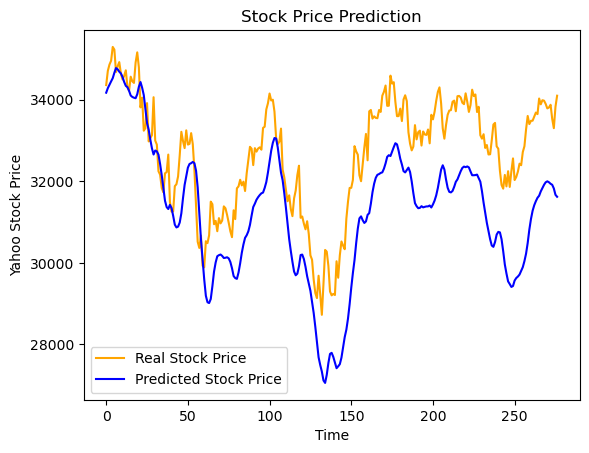

In [138]:
plt.plot(original, color = 'orange', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Yahoo Stock Price')
plt.legend()
plt.show()

In [139]:
pred.shape

(277,)

In [140]:
df_stock=df_input.iloc[-100:,:]
df_stock.tail()

,Close,Inflation Rate(USA),New Cases
Date,,,
2023-04-24,33875.40,8.3,14066.714
2023-04-25,33530.83,8.3,14066.714
2023-04-26,33301.87,8.3,14066.714
2023-04-27,33826.16,8.3,14066.714
2023-04-28,34098.16,8.3,14066.714


In [141]:
future_stock=df_input[['Close', 'Inflation Rate(USA)', 'New Cases']].copy()
future_stock.head()

,Close,Inflation Rate(USA),New Cases
Date,,,
2018-05-01,24099.05,2.2,0.0
2018-05-02,23924.98,2.2,0.0
2018-05-03,23930.15,2.2,0.0
2018-05-04,24262.51,2.2,0.0
2018-05-07,24357.32,2.2,0.0


In [142]:
future_stock["Close"]=0
future_stock=future_stock[["Close", "Inflation Rate(USA)", "New Cases"]]
old_scaled_array=scaler.transform(df_stock)
new_scaled_array=scaler.transform(future_stock)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [143]:
scaled_val=full_df.values
all_data=[]
time_step=30
for i in range(time_step,len(scaled_val)):
    data_x=[]
    data_x.append(
     scaled_val[i-time_step :i , 0:scaled_val.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 21ms/step


In [144]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,3, axis=-1)
y_pred_stock = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),3)))[:,0]
print(y_pred_stock)

[32275.592 31865.406 31285.734 ... 71028.97  71028.836 71028.7  ]


In [148]:
absolute_error = np.abs(original - pred)
percentage_error = (absolute_error / original) * 100

mpe_lstm2 = np.mean(percentage_error)

print("Mean Percentage Error:", mean_percentage_error)


Mean Percentage Error: 4.4712157749089885


In [152]:
absolute_error = np.abs(original - pred)
squared_error = absolute_error ** 2
# Mean Squared Error (MSE)
mse = np.mean(squared_error)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 2727349.433500282
Root Mean Squared Error (RMSE): 1651.4688714899478


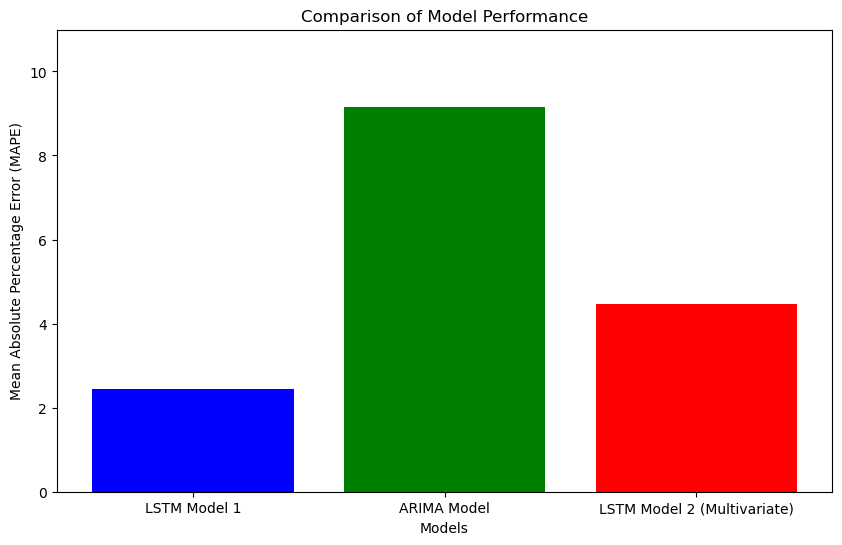

In [151]:
mape_values = [mpe_lstm1, percentage_error_arima, mpe_lstm2]

model_names = ['LSTM Model 1', 'ARIMA Model', 'LSTM Model 2 (Multivariate)']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mape_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Model Performance')
plt.ylim(0, max(mape_values) * 1.2)  
plt.xticks()
plt.show()
